In [ ]:
!pip install liac-arff

In [ ]:
import pandas as pd
import arff
import matplotlib.pyplot as plt
import seaborn as sns

#para fazer o under sampling
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from google.colab import drive #importa do drive
from sklearn.model_selection import KFold, ParameterGrid #importa biblioteca para o KFold
from sklearn.model_selection import train_test_split #impotação para o treinamento
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.stats import wilcoxon

from sklearn.model_selection import ParameterGrid,GridSearchCV #importa a classe ParameterGrid para gerar combinaçoes possiveis de hiperparemetros para busca em grade

import numpy as np #biblioteca NumPy para manipular arrays e operaçoes matematicas
from sklearn.preprocessing import StandardScaler# importa a classe StandardScaler para normalizar os dado
from sklearn.neighbors import KNeighborsClassifier #importa a classe KNeighborsClassifier para criar e treinar o modelo de classificação K-Nearest Neighbors (KNN)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/TrabalhoAprendizado'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TrabalhoAprendizado


In [ ]:
arquivo_data = 'Dry_Bean_Dataset.arff'
data = arff.load(open(arquivo_data, 'r'))
df = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])

print(df.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

<ipython-input-23-f46e82c68315>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


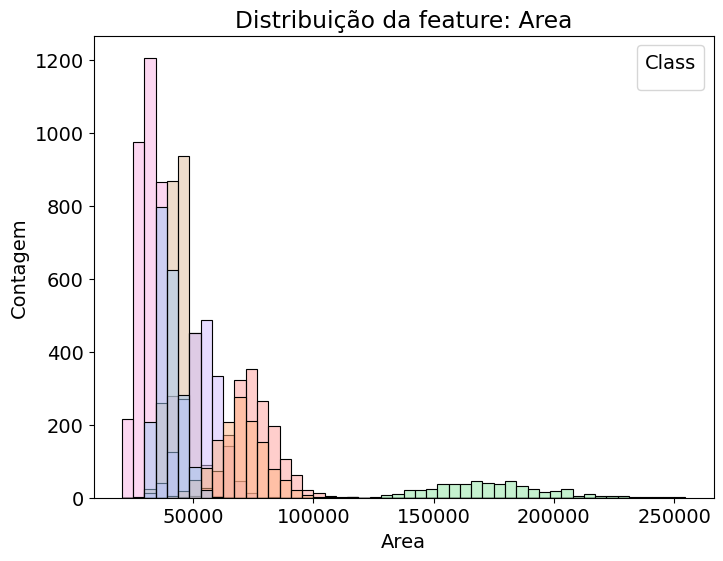

<ipython-input-23-f46e82c68315>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


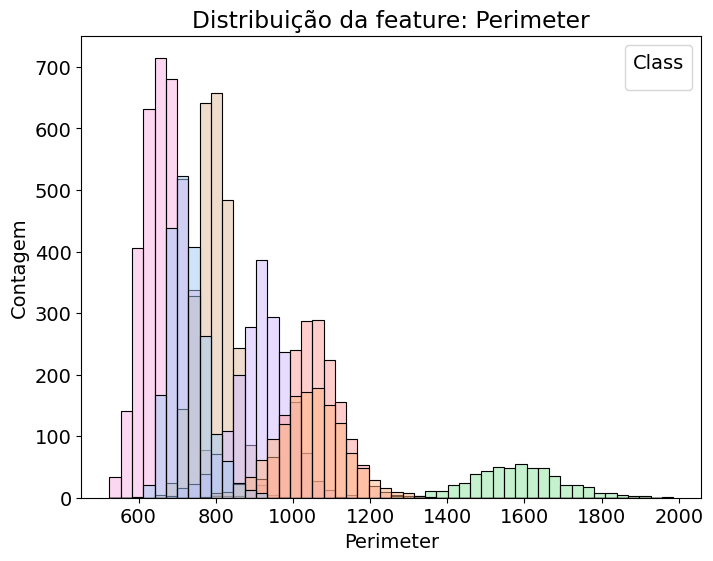

<ipython-input-23-f46e82c68315>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


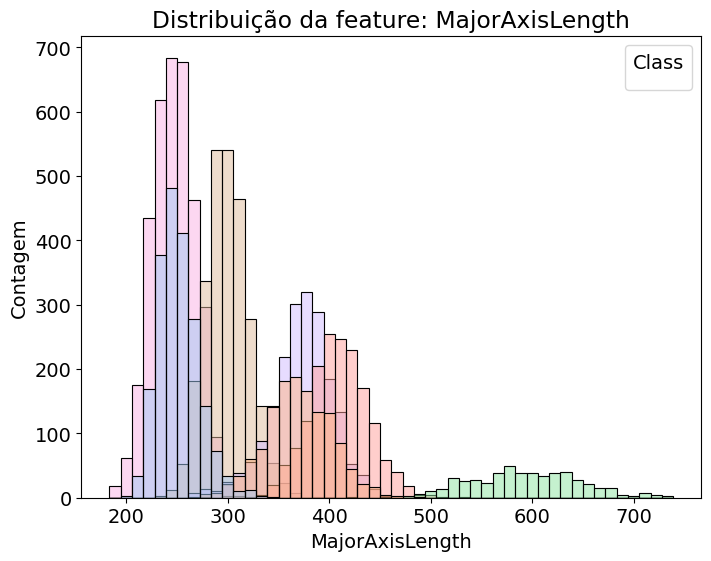

<ipython-input-23-f46e82c68315>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


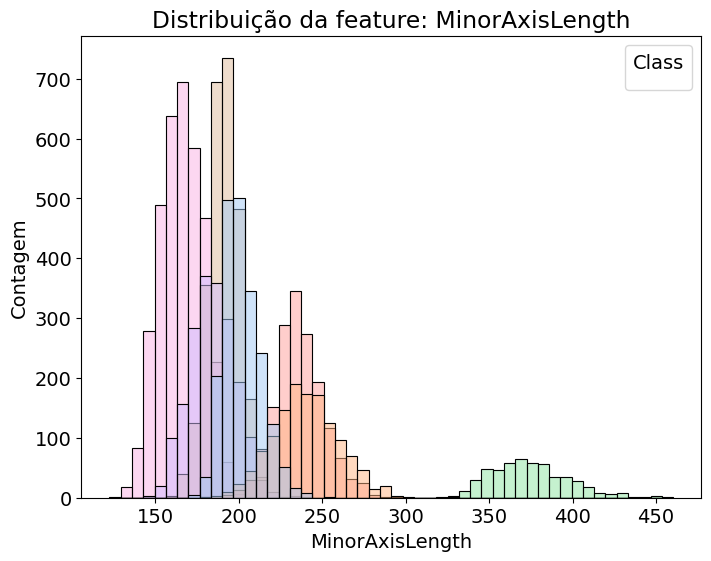

<ipython-input-23-f46e82c68315>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


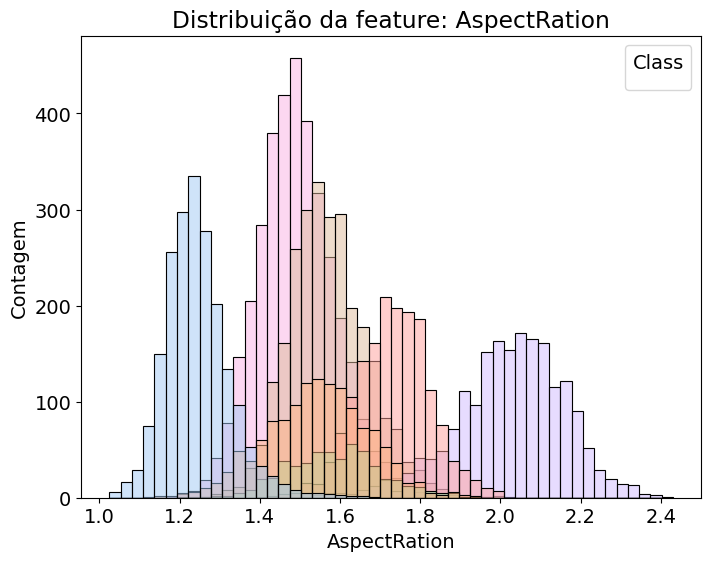

<ipython-input-23-f46e82c68315>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


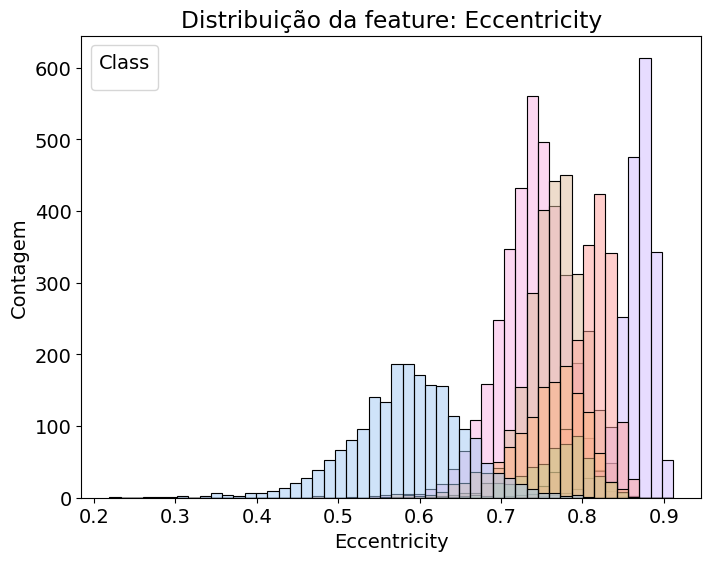

<ipython-input-23-f46e82c68315>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


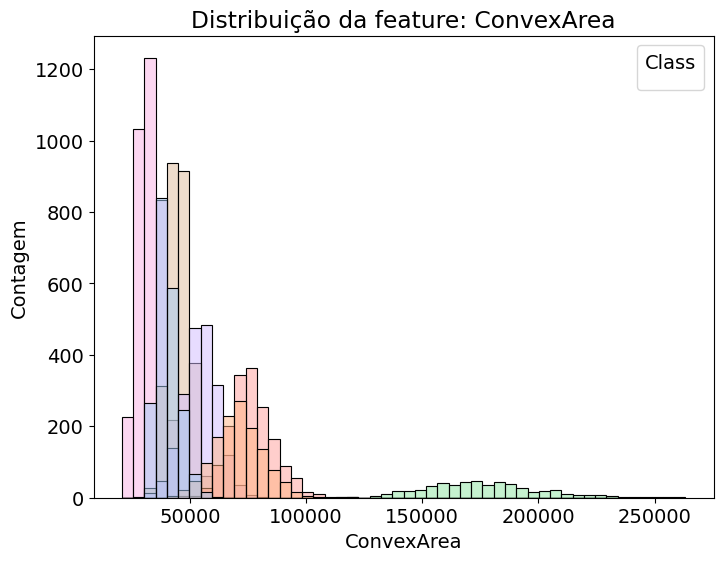

<ipython-input-23-f46e82c68315>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


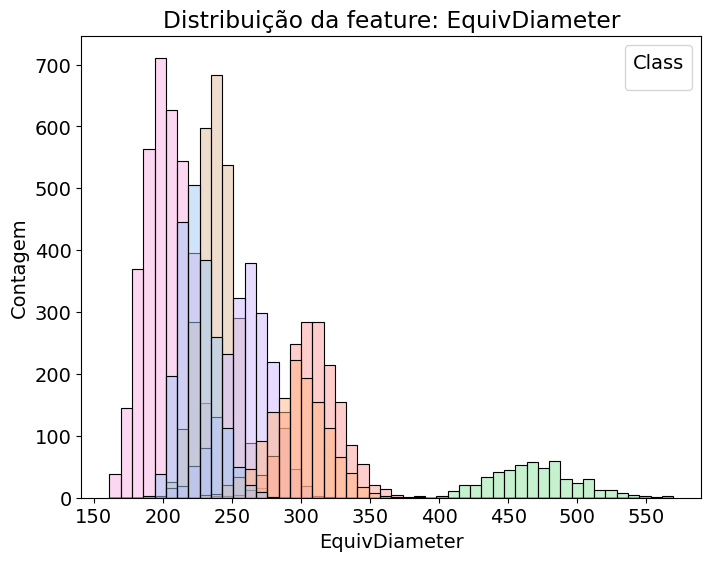

<ipython-input-23-f46e82c68315>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


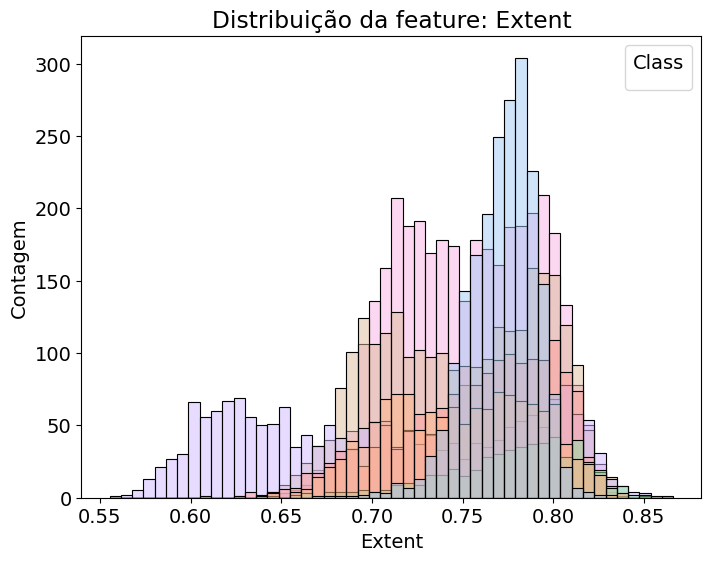

<ipython-input-23-f46e82c68315>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


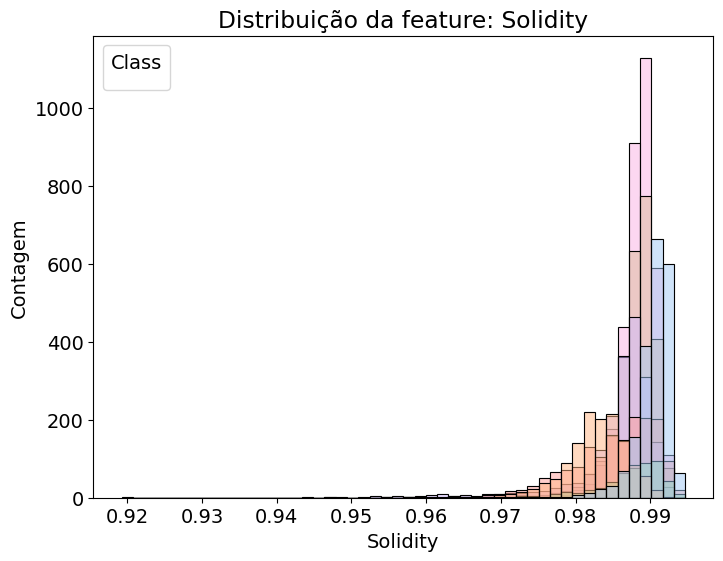

<ipython-input-23-f46e82c68315>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


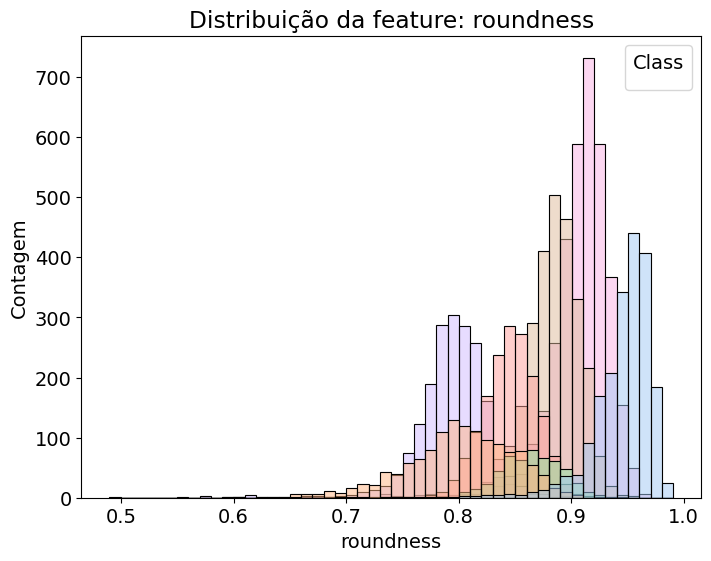

<ipython-input-23-f46e82c68315>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


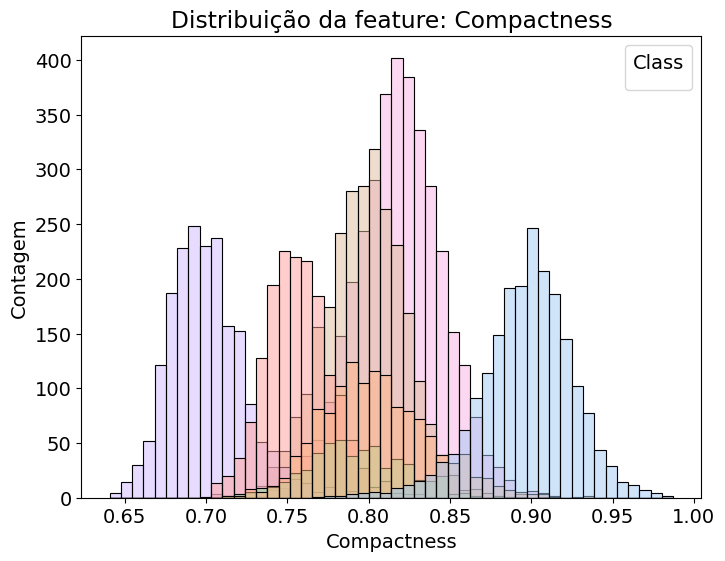

<ipython-input-23-f46e82c68315>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


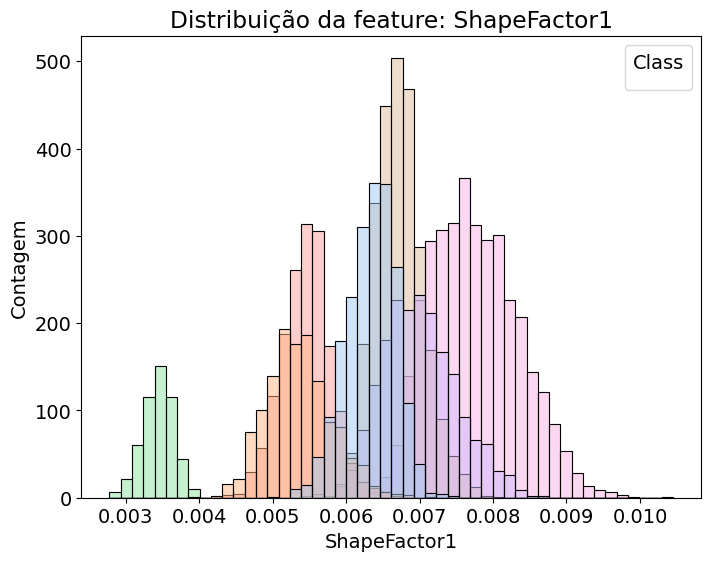

<ipython-input-23-f46e82c68315>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


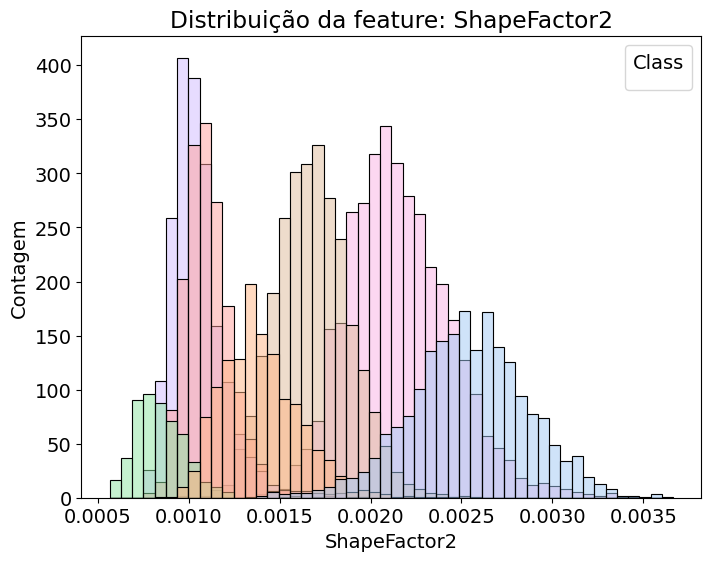

<ipython-input-23-f46e82c68315>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


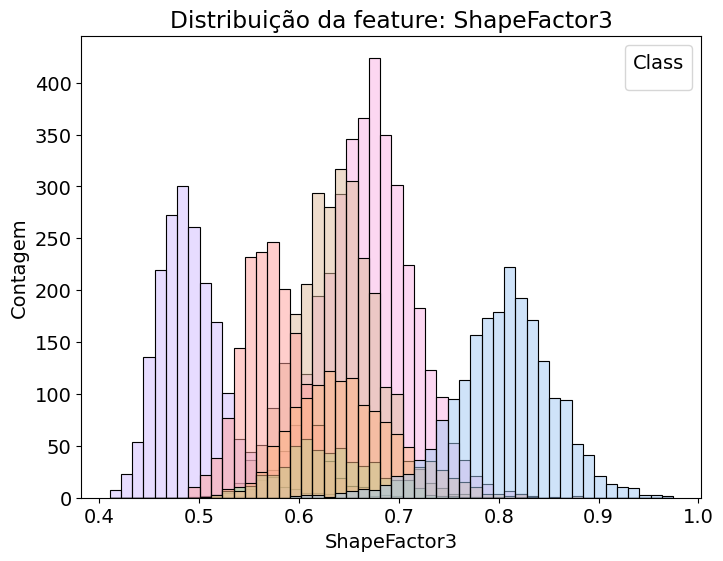

<ipython-input-23-f46e82c68315>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


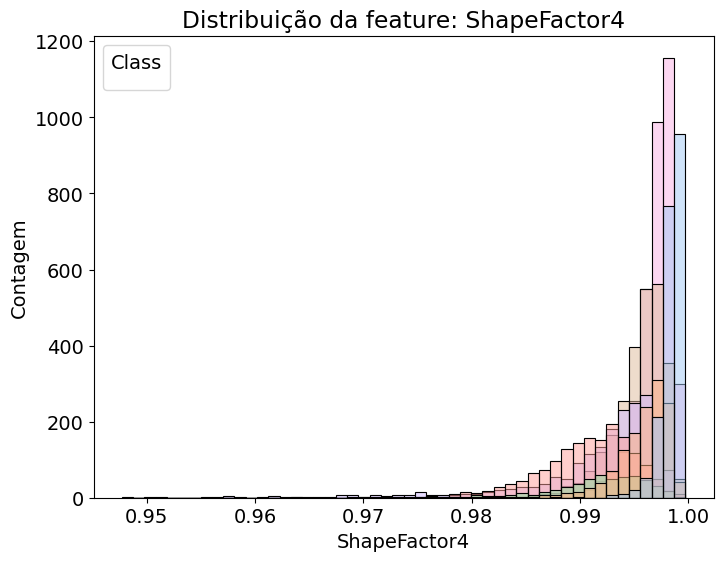

In [ ]:
#estograma das features

features = df.select_dtypes(include=['number']).columns

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='Class', kde=False, bins=50, palette="pastel")

    plt.xlabel(feature)
    plt.ylabel("Contagem")
    plt.title(f"Distribuição da feature: {feature}")
    plt.legend(title="Class")
    plt.show()

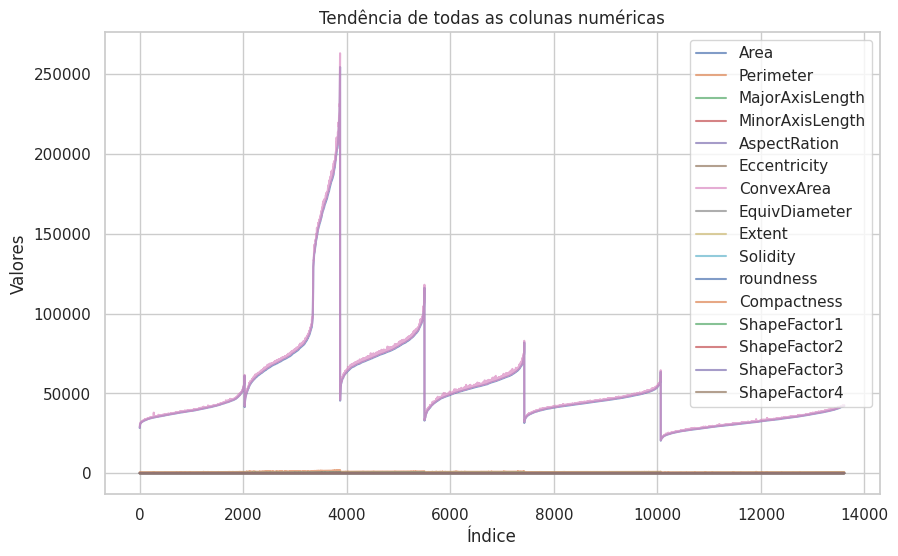

In [ ]:
#Line plot

colunas_numericas = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 6))
for coluna in colunas_numericas:
    plt.plot(df.index, df[coluna], label=coluna, alpha=0.7)

plt.title('Tendência de todas as colunas numéricas')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


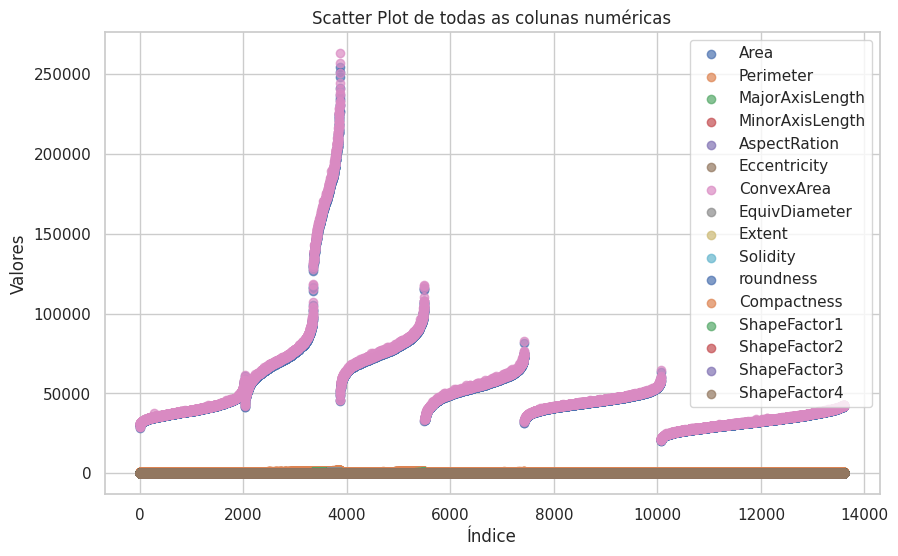

In [ ]:
#Scaterplot

colunas_numericas = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 6))

for coluna in colunas_numericas:
    plt.scatter(df.index, df[coluna], label=coluna, alpha=0.7)

plt.title('Scatter Plot de todas as colunas numéricas')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Boxplot do DataFrame completo')

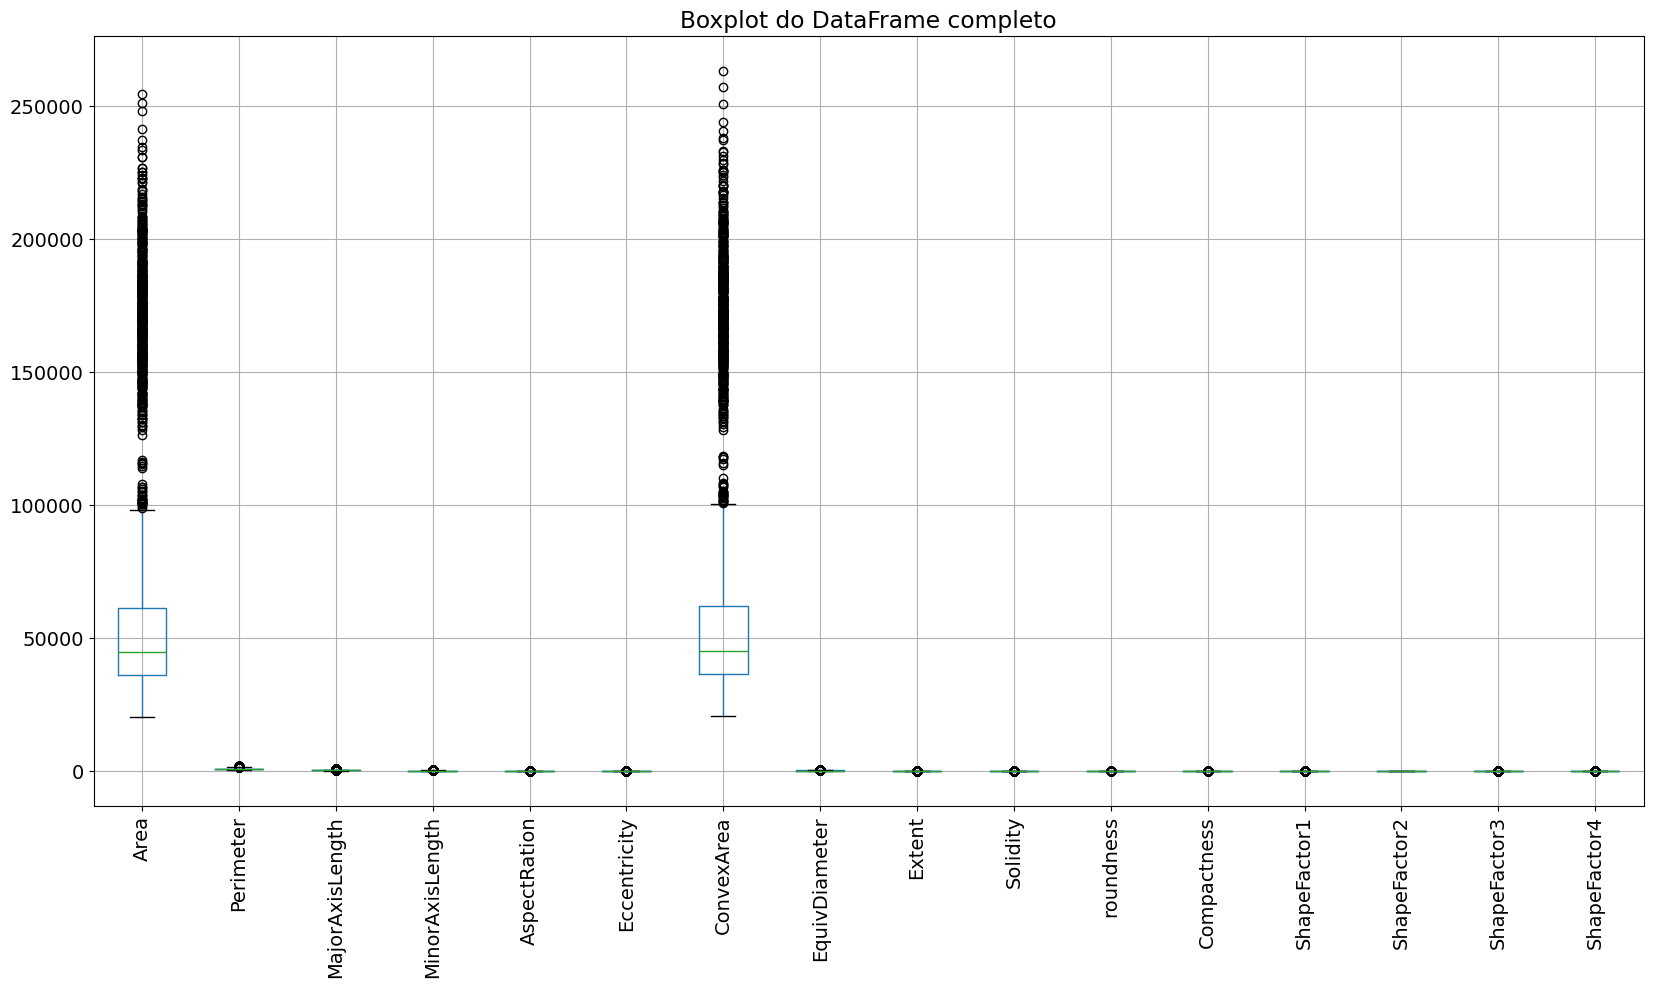

In [ ]:
#BoxPlot

plt.figure(figsize=(20, 10))
df.iloc[:, :-1].boxplot(rot=90)
plt.title('Boxplot do DataFrame completo')  # Título do gráfico

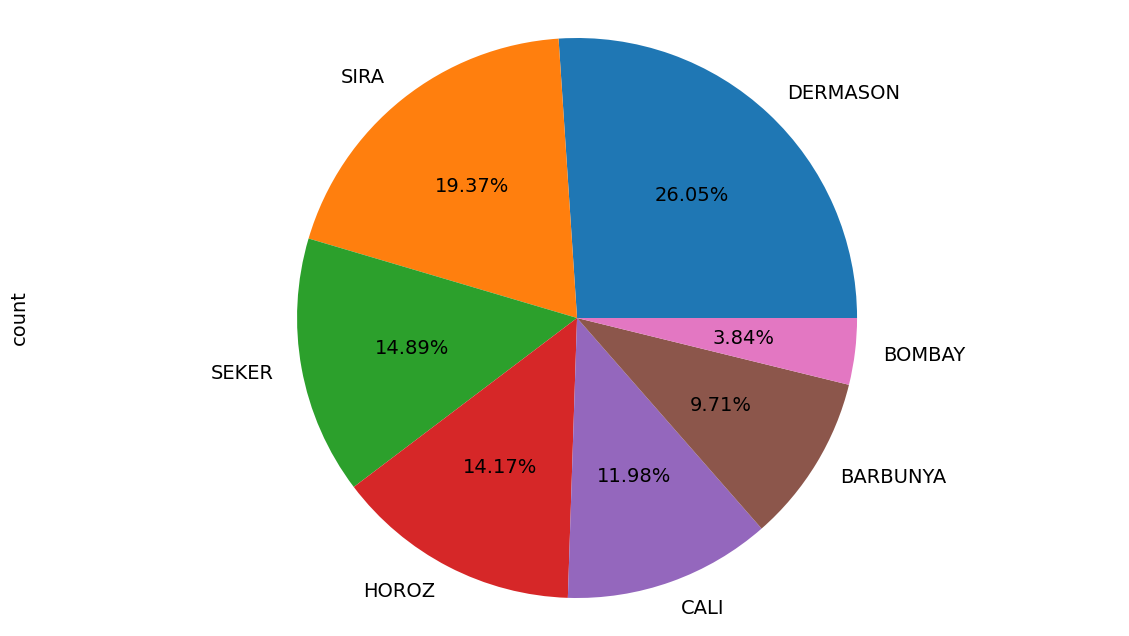

 Target Result 
 Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64 




In [ ]:
#Grafico de pizza das classes

plt.figure(figsize=(14,8))
plt.rc('font', size=14)
df['Class'].value_counts().plot(kind = 'pie',autopct='%1.2f%%')
plt.axis('equal')
plt.show()
print(" Target Result \n",df['Class'].value_counts(),"\n\n")

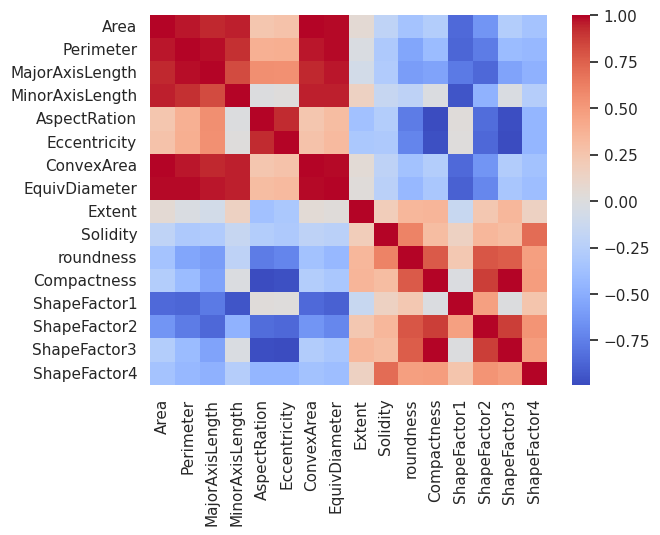

In [ ]:
#Matriz de correlação

corr = df.iloc[:,:-1].corr()
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [ ]:
# Criar uma máscara para as correlações acima do limite
limite_corr = 0.9
correlacoes_acima_do_limite = corr.abs() > limite_corr

# Encontrar os pares de variáveis altamente correlacionadas
pares_correlacionados = np.where(np.triu(correlacoes_acima_do_limite, k=1))
pares_correlacionados_list = [(corr.index[i], corr.columns[j]) for i, j in zip(*pares_correlacionados)]

# Identificar colunas a serem excluídas (mantendo uma coluna por par)
colunas_para_excluir = set()
for par in pares_correlacionados_list:
    colunas_para_excluir.add(par[1])  # Pode ajustar a lógica para escolher a coluna a manter

# Excluir colunas do DataFrame
df_reduzido = df.drop(columns=colunas_para_excluir)

print("Colunas excluídas:", colunas_para_excluir)
print("DataFrame resultante:")
print(df_reduzido)

Colunas excluídas: {'ShapeFactor1', 'Eccentricity', 'Perimeter', 'ShapeFactor3', 'ConvexArea', 'Compactness', 'MajorAxisLength', 'MinorAxisLength', 'EquivDiameter'}
DataFrame resultante:
        Area  AspectRation    Extent  Solidity  roundness  ShapeFactor2  \
0      28395      1.197191  0.763923  0.988856   0.958027      0.003147   
1      28734      1.097356  0.783968  0.984986   0.887034      0.003564   
2      29380      1.209713  0.778113  0.989559   0.947849      0.003048   
3      30008      1.153638  0.782681  0.976696   0.903936      0.003215   
4      30140      1.060798  0.773098  0.990893   0.984877      0.003665   
...      ...           ...       ...       ...        ...           ...   
13606  42097      1.552728  0.714574  0.990331   0.916603      0.001749   
13607  42101      1.476439  0.799943  0.990752   0.922015      0.001886   
13608  42139      1.472582  0.729932  0.989899   0.918424      0.001888   
13609  42147      1.489326  0.705389  0.987813   0.907906      

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Supondo que 'target' é a coluna que contém as classes
X = df_reduzido.drop('Class', axis=1)
y = df_reduzido['Class']

# Usar o RandomUnderSampler para balancear as classes
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_res, y_res = undersampler.fit_resample(X, y)

# Verificando a distribuição das classes
print("Distribuição das classes após o undersampling:\n", Counter(y_res))

# Criando um novo DataFrame equilibrado
df_equilibrado = pd.concat([X_res, y_res], axis=1)

# Ordenar o DataFrame pelo target para que as classes fiquem agrupadas
df_equilibrado = df_equilibrado.sort_values(by='Class').reset_index(drop=True)

print("DataFrame equilibrado e ordenado:")


Distribuição das classes após o undersampling:
 Counter({'BARBUNYA': 522, 'BOMBAY': 522, 'CALI': 522, 'DERMASON': 522, 'HOROZ': 522, 'SEKER': 522, 'SIRA': 522})
DataFrame equilibrado e ordenado:
       Area  AspectRation    Extent  Solidity  roundness  ShapeFactor2  \
0     70776      1.651515  0.775763  0.983300   0.790227      0.001225   
1     86593      1.633522  0.770949  0.980668   0.783902      0.001122   
2     80479      1.690521  0.789072  0.989415   0.853273      0.001110   
3     52104      1.511970  0.774113  0.981095   0.797042      0.001637   
4     89968      1.548867  0.784548  0.980129   0.743032      0.001193   
...     ...           ...       ...       ...        ...           ...   
3649  47571      1.785214  0.646960  0.983339   0.822963      0.001313   
3650  44875      1.587567  0.729912  0.990312   0.908514      0.001637   
3651  44660      1.461551  0.788350  0.991167   0.916251      0.001858   
3652  42849      1.749132  0.793500  0.982888   0.841780      0.0

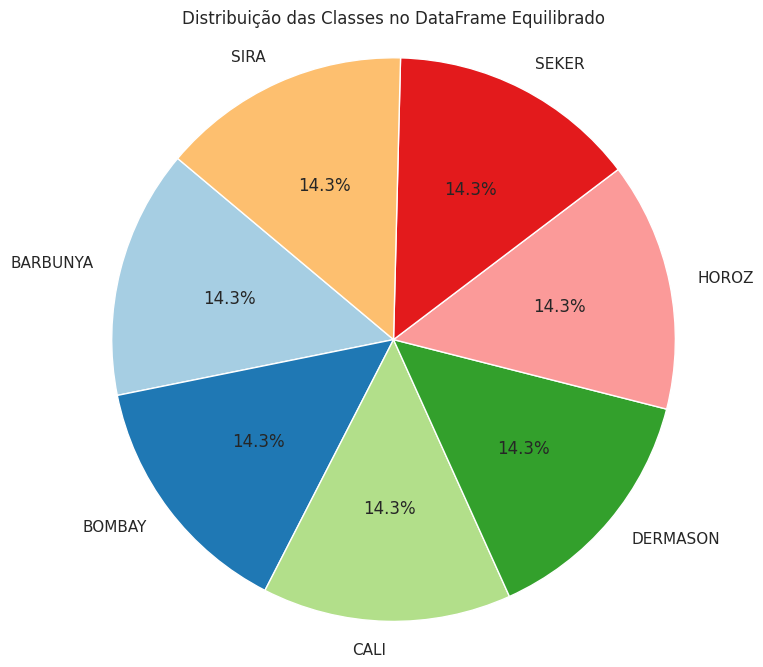

In [ ]:
# Verificar a distribuição das classes no DataFrame equilibrado
distribuicao_classes = df_equilibrado['Class'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(distribuicao_classes, labels=distribuicao_classes.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição das Classes no DataFrame Equilibrado')
plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo
plt.show()

In [ ]:
num_amostras, num_features = df_equilibrado.shape

print(f"Número de amostras: {num_amostras}")
print(f"Número de features: {num_features - 1}")

Número de amostras: 3654
Número de features: 7


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
colunas_categoricas = df_equilibrado.select_dtypes(include=['object']).columns

# Instanciar o OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Aplicar o OneHotEncoder nas colunas categóricas
df_encoded = pd.DataFrame(encoder.fit_transform(df_equilibrado[colunas_categoricas]), columns=encoder.get_feature_names_out(colunas_categoricas))

# Concatenar as colunas codificadas ao DataFrame original, excluindo as colunas categóricas originais
df_equilibrado_encoded = pd.concat([df_equilibrado.drop(columns=colunas_categoricas), df_encoded], axis=1)

print("DataFrame com One Hot Encoding aplicado:")
print(df_equilibrado_encoded.head())

# Identificar todas as colunas de classes
colunas_classes = df_encoded.columns

# Dividir em X (features) e y (target)
X = df_equilibrado_encoded.drop(columns=colunas_classes)
Y = df_equilibrado_encoded[colunas_classes]

print("Features (X):")
print(X.head())

print("Target (y):")
print(y.head())


DataFrame com One Hot Encoding aplicado:
    Area  AspectRation    Extent  Solidity  roundness  ShapeFactor2  \
0  70776      1.651515  0.775763  0.983300   0.790227      0.001225   
1  86593      1.633522  0.770949  0.980668   0.783902      0.001122   
2  80479      1.690521  0.789072  0.989415   0.853273      0.001110   
3  52104      1.511970  0.774113  0.981095   0.797042      0.001637   
4  89968      1.548867  0.784548  0.980129   0.743032      0.001193   

   ShapeFactor4  Class_BARBUNYA  Class_BOMBAY  Class_CALI  Class_DERMASON  \
0      0.995658             1.0           0.0         0.0             0.0   
1      0.993317             1.0           0.0         0.0             0.0   
2      0.996380             1.0           0.0         0.0             0.0   
3      0.998708             1.0           0.0         0.0             0.0   
4      0.994023             1.0           0.0         0.0             0.0   

   Class_HOROZ  Class_SEKER  Class_SIRA  
0          0.0          0.0

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

print(kf)

KFold(n_splits=10, random_state=42, shuffle=True)


In [ ]:
# Definir os grids dos hiperparâmetros para cada algoritmo

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
}

param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

param_grid_nb = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]

}

print("Grids de hiperparâmetros configuradas com sucesso!")


Grids de hiperparâmetros configuradas com sucesso!


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_full, X_test = X.iloc[train_index], X.iloc[test_index]  # Selecionar treino e teste
    Y_train_full, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # dividir o conjunto de treino em treino e validação
    X_train, X_val, Y_train, Y_val = train_test_split(X_train_full, Y_train_full, test_size=0.2, random_state=42)


    # Converter as labels para arrays unidimensionais???
    Y_train = np.argmax(Y_train.values, axis=1)
    Y_val = np.argmax(Y_val.values, axis=1)
    Y_train_full = np.argmax(Y_train_full.values, axis=1)
    Y_test = np.argmax(Y_test.values, axis=1)

    # normalização
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Treinar com o conjunto completo
    scaler_full = StandardScaler()
    X_train_full_scaled = scaler_full.fit_transform(X_train_full)
    X_test_scaled = scaler_full.transform(X_test)

    # listas de armazenar as metricas e parametros do knn
    accs_val_knn = []
    precisions_val_knn = []
    recalls_val_knn = []
    f1s_val_knn = []
    par_knn = []

    #listas para armazenar as metricas e parametros do decision tree
    accs_val_dt = []
    precisions_val_dt = []
    recalls_val_dt = []
    f1s_val_dt = []
    par_dt = []

    # Listas para armazenar as métricas e parâmetros do random florest
    accs_val_rf = []
    precisions_val_rf = []
    recalls_val_rf = []
    f1s_val_rf = []
    par_rf = []

    # Inicializar listas para armazenar métricas e parâmetros do SVM
    accs_val_svm = []
    precisions_val_svm = []
    recalls_val_svm = []
    f1s_val_svm = []
    par_svm = []

   #lista para armazenar metricas e parametros do NB
    accs_val_nb = []
    precisions_val_nb = []
    recalls_val_nb = []
    f1s_val_nb = []
    par_nb = []

  #grid knn
    for params in ParameterGrid(param_grid_knn):
        knn = KNeighborsClassifier(metric=params['metric'], n_neighbors=params['n_neighbors'])
        knn.fit(X_train_scaled, Y_train)
        Y_pred = knn.predict(X_val_scaled)
        acc = accuracy_score(Y_val, Y_pred)  # Calculate accuracy on validation set
        accs_val_knn.append(acc)
        par_knn.append(params)

        # Calcular métricas
        acc = accuracy_score(Y_val, Y_pred)
        precision = precision_score(Y_val, Y_pred, average='weighted')
        recall = recall_score(Y_val, Y_pred, average='weighted')
        f1 = f1_score(Y_val, Y_pred, average='weighted')

        # Armazenar métricas e parâmetros
        accs_val_knn.append(acc)
        precisions_val_knn.append(precision)
        recalls_val_knn.append(recall)
        f1s_val_knn.append(f1)
        par_knn.append(params)

    # Grid para AD
    for params in ParameterGrid(param_grid_dt):
        dt = DecisionTreeClassifier(max_depth=params['max_depth'], min_samples_split=params['min_samples_split'])
        dt.fit(X_train_scaled, Y_train)
        Y_pred = dt.predict(X_val_scaled)
        acc = accuracy_score(Y_val, Y_pred)
        accs_val_dt.append(acc)
        par_dt.append(params)

        # Calcular métricas
        acc = accuracy_score(Y_val, Y_pred)
        precision = precision_score(Y_val, Y_pred, average='weighted')
        recall = recall_score(Y_val, Y_pred, average='weighted')
        f1 = f1_score(Y_val, Y_pred, average='weighted')

        # Armazenar métricas e parâmetros
        accs_val_dt.append(acc)
        precisions_val_dt.append(precision)
        recalls_val_dt.append(recall)
        f1s_val_dt.append(f1)
        par_dt.append(params)

    # Grid pra RF
    for params in ParameterGrid(param_grid_rf):
        rf = RandomForestClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'])
        rf.fit(X_train_scaled, Y_train)
        Y_pred = rf.predict(X_val_scaled)
        acc = accuracy_score(Y_val, Y_pred)
        accs_val_rf.append(acc)
        par_rf.append(params)

        # Calcular métricas
        acc = accuracy_score(Y_val, Y_pred)
        precision = precision_score(Y_val, Y_pred, average='weighted')
        recall = recall_score(Y_val, Y_pred, average='weighted')
        f1 = f1_score(Y_val, Y_pred, average='weighted')

        # Armazenar métricas e parâmetros
        accs_val_rf.append(acc)
        precisions_val_rf.append(precision)
        recalls_val_rf.append(recall)
        f1s_val_rf.append(f1)
        par_rf.append(params)

     # Grid para SVM
    for params in ParameterGrid(param_grid_svm):
        svm = SVC(C=params['C'], kernel=params['kernel'])
        svm.fit(X_train_scaled, Y_train)
        Y_pred = svm.predict(X_val_scaled)

        # Calcular métricas
        acc = accuracy_score(Y_val, Y_pred)
        precision = precision_score(Y_val, Y_pred, average='weighted')
        recall = recall_score(Y_val, Y_pred, average='weighted')
        f1 = f1_score(Y_val, Y_pred, average='weighted')

        # Armazenar métricas e parâmetros
        accs_val_svm.append(acc)
        precisions_val_svm.append(precision)
        recalls_val_svm.append(recall)
        f1s_val_svm.append(f1)
        par_svm.append(params)

    # Grid para Naive Bayes
    for params in ParameterGrid(param_grid_nb):
        nb = GaussianNB(var_smoothing=params['var_smoothing'])
        nb.fit(X_train_scaled, Y_train)
        Y_pred = nb.predict(X_val_scaled)

        # Calcular métricas
        acc = accuracy_score(Y_val, Y_pred)
        precision = precision_score(Y_val, Y_pred, average='weighted')
        recall = recall_score(Y_val, Y_pred, average='weighted')
        f1 = f1_score(Y_val, Y_pred, average='weighted')

        # Armazenar métricas e parâmetros
        accs_val_nb.append(acc)
        precisions_val_nb.append(precision)
        recalls_val_nb.append(recall)
        f1s_val_nb.append(f1)
        par_nb.append(params)




    # Treinar com o conjunto completo
    scaler_full = StandardScaler()
    X_train_full_scaled = scaler_full.fit_transform(X_train_full)
    X_test_scaled = scaler_full.transform(X_test)


    # calcular todas as metricas
    acc = accuracy_score(Y_val, Y_pred)
    precision = precision_score(Y_val, Y_pred, average='weighted')
    recall = recall_score(Y_val, Y_pred, average='weighted')
    f1 = f1_score(Y_val, Y_pred, average='weighted')


    # escolher os melhores parametros com base no F1-Score?
    #knn
    best_index_knn = f1s_val_knn.index(max(f1s_val_knn))
    best_params_knn = par_knn[best_index_knn]
    best_acc_knn = accs_val_knn[best_index_knn]
    best_precision_knn = precisions_val_knn[best_index_knn]
    best_recall_knn = recalls_val_knn[best_index_knn]
    best_f1_knn = f1s_val_knn[best_index_knn]

    #dt
    best_index_dt = f1s_val_dt.index(max(f1s_val_dt))
    best_params_dt = par_dt[best_index_dt]
    best_acc_dt = accs_val_dt[best_index_dt]
    best_precision_dt = precisions_val_dt[best_index_dt]
    best_recall_dt = recalls_val_dt[best_index_dt]
    best_f1_dt = f1s_val_dt[best_index_dt]

    #rf
    best_index_rf = f1s_val_rf.index(max(f1s_val_rf))
    best_params_rf = par_rf[best_index_rf]
    best_acc_rf = accs_val_rf[best_index_rf]
    best_precision_rf = precisions_val_rf[best_index_rf]
    best_recall_rf = recalls_val_rf[best_index_rf]
    best_f1_rf = f1s_val_rf[best_index_rf]

    #svm
    best_index_svm = f1s_val_svm.index(max(f1s_val_svm))
    best_params_svm = par_svm[best_index_svm]
    best_acc_svm = accs_val_svm[best_index_svm]
    best_precision_svm = precisions_val_svm[best_index_svm]
    best_recall_svm = recalls_val_svm[best_index_svm]
    best_f1_svm = f1s_val_svm[best_index_svm]

    #nb
    best_index_nb = f1s_val_nb.index(max(f1s_val_nb))
    best_params_nb = par_nb[best_index_nb]
    best_acc_nb = accs_val_nb[best_index_nb]
    best_precision_nb = precisions_val_nb[best_index_nb]
    best_recall_nb = recalls_val_nb[best_index_nb]
    best_f1_nb = f1s_val_nb[best_index_nb]



        # Printar métricas para KNN
    print(f"Fold {i+1}:")
    print(f"Melhores parâmetros KNN: {best_params_knn}")
    print(f"Acurácia: {best_acc_knn:.4f}, F1-Score: {best_f1_knn:.4f}")
    print(f"Precisão: {best_precision_knn:.4f}, Recall: {best_recall_knn:.4f}")

    # Printar métricas para Árvore de Decisão
    print(f"Melhores parâmetros Árvore de Decisão: {best_params_dt}")
    print(f"Acurácia: {best_acc_dt:.4f}, F1-Score: {best_f1_dt:.4f}")
    print(f"Precisão: {best_precision_dt:.4f}, Recall: {best_recall_dt:.4f}")

    # Printar métricas para Random Forest
    print(f"Melhores parâmetros Random Forest: {best_params_rf}")
    print(f"Acurácia: {best_acc_rf:.4f}, F1-Score: {best_f1_rf:.4f}")
    print(f"Precisão: {best_precision_rf:.4f}, Recall: {best_recall_rf:.4f}")

    # Printar métricas para SVM
    print(f"Melhores parâmetros SVM: {best_params_svm}")
    print(f"Acurácia: {best_acc_svm:.4f}, F1-Score: {best_f1_svm:.4f}")
    print(f"Precisão: {best_precision_svm:.4f}, Recall: {best_recall_svm:.4f}")

    # Printar métricas para nb
    print(f"Melhores parâmetros NB: {best_params_nb}")
    print(f"Acurácia: {best_acc_nb:.4f}, F1-Score: {best_f1_nb:.4f}")
    print(f"Precisão: {best_precision_nb:.4f}, Recall: {best_recall_nb:.4f}")
    print("\n")

    #variavel para armazenar o f1 de todos os algoritmos e somar com os proximos
    media_f1_knn = np.mean(f1s_val_knn)
    media_f1_dt = np.mean(f1s_val_dt)
    media_f1_rf = np.mean(f1s_val_rf)
    media_f1_svm = np.mean(f1s_val_svm)
    media_f1_nb = np.mean(f1s_val_nb)

    media_accs_knn = np.mean(accs_val_knn)
    media_accs_dt = np.mean(accs_val_dt)
    media_accs_rf = np.mean(accs_val_rf)
    media_accs_svm = np.mean(accs_val_svm)
    media_accs_nb = np.mean(accs_val_nb)

    media_recalls_knn = np.mean(recalls_val_knn)
    media_recalls_dt = np.mean(recalls_val_dt)
    media_recalls_rf = np.mean(recalls_val_rf)
    media_recalls_svm = np.mean(recalls_val_svm)
    media_recalls_nb = np.mean(recalls_val_nb)

    media_precisions_knn = np.mean(precisions_val_knn)
    media_precisions_dt = np.mean(precisions_val_dt)
    media_precisions_rf = np.mean(precisions_val_rf)
    media_precisions_svm = np.mean(precisions_val_svm)
    media_precision_nb = np.mean(precisions_val_nb)




Fold 1:
Melhores parâmetros KNN: {'metric': 'euclidean', 'n_neighbors': 9}
Acurácia: 0.8951, F1-Score: 0.9120
Precisão: 0.9137, Recall: 0.9119
Melhores parâmetros Árvore de Decisão: {'max_depth': None, 'min_samples_split': 5}
Acurácia: 0.9043, F1-Score: 0.9198
Precisão: 0.9219, Recall: 0.9195
Melhores parâmetros Random Forest: {'max_depth': None, 'n_estimators': 50}
Acurácia: 0.9422, F1-Score: 0.9421
Precisão: 0.9426, Recall: 0.9422
Melhores parâmetros SVM: {'C': 10, 'kernel': 'linear'}
Acurácia: 0.9362, F1-Score: 0.9359
Precisão: 0.9359, Recall: 0.9362
Melhores parâmetros NB: {'var_smoothing': 1e-09}
Acurácia: 0.8982, F1-Score: 0.8975
Precisão: 0.8993, Recall: 0.8982


Fold 2:
Melhores parâmetros KNN: {'metric': 'euclidean', 'n_neighbors': 11}
Acurácia: 0.8982, F1-Score: 0.9155
Precisão: 0.9189, Recall: 0.9149
Melhores parâmetros Árvore de Decisão: {'max_depth': None, 'min_samples_split': 5}
Acurácia: 0.9058, F1-Score: 0.9180
Precisão: 0.9182, Recall: 0.9179
Melhores parâmetros Random

In [ ]:
media_f1_knn = np.mean(f1s_val_knn)
media_f1_dt = np.mean(f1s_val_dt)
media_f1_rf = np.mean(f1s_val_rf)
media_f1_svm = np.mean(f1s_val_svm)
media_f1_nb = np.mean(f1s_val_nb)

media_acc_knn = np.mean(accs_val_knn)
media_acc_dt = np.mean(accs_val_dt)
media_acc_rf = np.mean(accs_val_rf)
media_acc_svm = np.mean(accs_val_svm)
media_acc_nb = np.mean(accs_val_nb)

media_recall_knn = np.mean(recalls_val_knn)
media_recall_dt = np.mean(recalls_val_dt)
media_recall_rf = np.mean(recalls_val_rf)
media_recall_svm = np.mean(recalls_val_svm)
media_recall_nb = np.mean(recalls_val_nb)

media_precisions_knn = np.mean(precisions_val_knn)
media_precisions_dt = np.mean(precisions_val_dt)
media_precisions_rf = np.mean(precisions_val_rf)
media_precisions_svm = np.mean(precisions_val_svm)
media_precision_nb = np.mean(precisions_val_nb)

print('Média F1 KNN:', media_f1_knn)
print('Média F1 DT:', media_f1_dt)
print('Média F1 RF:', media_f1_rf)
print('Média F1 SVM:', media_f1_svm)
print('Média F1 NB:', media_f1_nb)

print('Média Acc KNN:', media_acc_knn)
print('Média Acc DT:', media_acc_dt)
print('Média Acc RF:', media_acc_rf)
print('Média Acc SVM:', media_acc_svm)
print('Média Acc NB:', media_acc_nb)

print('Média Recall KNN:', media_recall_knn)
print('Média Recall DT:', media_recall_dt)
print('Média Recall RF:', media_recall_rf)
print('Média Recall SVM:', media_recall_svm)
print('Média Recall NB:', media_recall_nb)

print('Média Precision KNN:', media_precisions_knn)
print('Média Precision DT:', media_precisions_dt)
print('Média Precision RF:', media_precisions_rf)
print('Média Precision SVM:', media_precisions_svm)
print('Média Precision NB:', media_precision_nb)

Média F1 KNN: 0.8994044515729314
Média F1 DT: 0.9070388468646993
Média F1 RF: 0.9338067177908935
Média F1 SVM: 0.8487503176128524
Média F1 NB: 0.8984307357671579
Média Acc KNN: 0.8990121580547111
Média Acc DT: 0.9071259709557581
Média Acc RF: 0.9338061465721039
Média Acc SVM: 0.8470111448834853
Média Acc NB: 0.898176291793313
Média Recall KNN: 0.8990121580547112
Média Recall DT: 0.9071259709557583
Média Recall RF: 0.9338061465721039
Média Recall SVM: 0.8470111448834853
Média Recall NB: 0.898176291793313
Média Precision KNN: 0.901589731731703
Média Precision DT: 0.9074749877380697
Média Precision RF: 0.9341564615399732
Média Precision SVM: 0.8646011456830802
Média Precision NB: 0.9004506554974983


In [ ]:
# Colocando as melhores pontuações F1 em arrays
f1_scores_knn = np.array(media_f1_knn)
f1_scores_dt = np.array(media_f1_dt)
f1_scores_rf = np.array(media_f1_rf)
f1_scores_svm = np.array(media_f1_svm)
f1_scores_nb = np.array(media_f1_nb)

# Comparar KNN com Decision Tree
estatistica_knn_dt, p_valor_knn_dt = wilcoxon(f1_scores_knn, f1_scores_dt)
print(f'KNN vs Decision Tree - Estatística de Wilcoxon: {estatistica_knn_dt}, Valor-p: {p_valor_knn_dt}')

# Comparar KNN com Random Forest
estatistica_knn_rf, p_valor_knn_rf = wilcoxon(f1_scores_knn, f1_scores_rf)
print(f'KNN vs Random Forest - Estatística de Wilcoxon: {estatistica_knn_rf}, Valor-p: {p_valor_knn_rf}')

# Comparar KNN com SVM
estatistica_knn_svm, p_valor_knn_svm = wilcoxon(f1_scores_knn, f1_scores_svm)
print(f'KNN vs SVM - Estatística de Wilcoxon: {estatistica_knn_svm}, Valor-p: {p_valor_knn_svm}')

# Comparar Decision Tree com Random Forest
estatistica_dt_rf, p_valor_dt_rf = wilcoxon(f1_scores_dt, f1_scores_rf)
print(f'Decision Tree vs Random Forest - Estatística de Wilcoxon: {estatistica_dt_rf}, Valor-p: {p_valor_dt_rf}')

# Comparar Decision Tree com SVM
estatistica_dt_svm, p_valor_dt_svm = wilcoxon(f1_scores_dt, f1_scores_svm)
print(f'Decision Tree vs SVM - Estatística de Wilcoxon: {estatistica_dt_svm}, Valor-p: {p_valor_dt_svm}')

# Comparar Random Forest com SVM
estatistica_rf_svm, p_valor_rf_svm = wilcoxon(f1_scores_rf, f1_scores_svm)
print(f'Random Forest vs SVM - Estatística de Wilcoxon: {estatistica_rf_svm}, Valor-p: {p_valor_rf_svm}')

#comparar naive bayes com kNN
estatistica_nb_knn, p_valor_nb_knn = wilcoxon(f1_scores_nb, f1_scores_knn)
print(f'Naive Bayes vs KNN - Estatística de Wilcoxon: {estatistica_nb_knn}, Valor-p: {p_valor_nb_knn}')

#comparar naive bayes com decision tree
estatistica_nb_dt, p_valor_nb_dt = wilcoxon(f1_scores_nb, f1_scores_dt)
print(f'Naive Bayes vs Decision Tree - Estatística de Wilcoxon: {estatistica_nb_dt}, Valor-p: {p_valor_nb_dt}')

#comparar naice bayes com ramdom florest
estatistica_nb_rf, p_valor_nb_rf = wilcoxon(f1_scores_nb, f1_scores_rf)
print(f'Naive Bayes vs Random Forest - Estatística de Wilcoxon: {estatistica_nb_rf}, Valor-p: {p_valor_nb_rf}')

#comparar naive bayes com svm
estatistica_nb_svm, p_valor_nb_svm = wilcoxon(f1_scores_nb, f1_scores_svm)
print(f'Naive Bayes vs SVM - Estatística de Wilcoxon: {estatistica_nb_svm}, Valor-p: {p_valor_nb_svm}')

# Interpretação dos resultados
def interpretar_resultados(p_valor, alfa=0.05):
    if p_valor < alfa:
        return "Rejeitamos a hipótese nula. Há uma diferença significativa entre os algoritmos."
    else:
        return "Não rejeitamos a hipótese nula. Não há uma diferença significativa entre os algoritmos."

print(interpretar_resultados(p_valor_knn_dt))
print(interpretar_resultados(p_valor_knn_rf))
print(interpretar_resultados(p_valor_knn_svm))
print(interpretar_resultados(p_valor_dt_rf))
print(interpretar_resultados(p_valor_dt_svm))
print(interpretar_resultados(p_valor_rf_svm))
print(interpretar_resultados(p_valor_nb_knn))
print(interpretar_resultados(p_valor_nb_dt))
print(interpretar_resultados(p_valor_nb_rf))
print(interpretar_resultados(p_valor_nb_svm))

KNN vs Decision Tree - Estatística de Wilcoxon: 0.0, Valor-p: 1.0
KNN vs Random Forest - Estatística de Wilcoxon: 0.0, Valor-p: 1.0
KNN vs SVM - Estatística de Wilcoxon: 0.0, Valor-p: 1.0
Decision Tree vs Random Forest - Estatística de Wilcoxon: 0.0, Valor-p: 1.0
Decision Tree vs SVM - Estatística de Wilcoxon: 0.0, Valor-p: 1.0
Random Forest vs SVM - Estatística de Wilcoxon: 0.0, Valor-p: 1.0
Naive Bayes vs KNN - Estatística de Wilcoxon: 0.0, Valor-p: 1.0
Naive Bayes vs Decision Tree - Estatística de Wilcoxon: 0.0, Valor-p: 1.0
Naive Bayes vs Random Forest - Estatística de Wilcoxon: 0.0, Valor-p: 1.0
Naive Bayes vs SVM - Estatística de Wilcoxon: 0.0, Valor-p: 1.0
Não rejeitamos a hipótese nula. Não há uma diferença significativa entre os algoritmos.
Não rejeitamos a hipótese nula. Não há uma diferença significativa entre os algoritmos.
Não rejeitamos a hipótese nula. Não há uma diferença significativa entre os algoritmos.
Não rejeitamos a hipótese nula. Não há uma diferença significati